### 1. Load and Preprocess Data


In [5]:
import pandas as pd 
import numpy as np
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [2]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
# Normalize the 'Amount' column
from sklearn.preprocessing import StandardScaler
data['Normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [6]:
# Handle class imbalance
fraud_count = data['Class'].value_counts()[1]
non_fraud_indices = data[data['Class'] == 0].index
random_indices = np.random.choice(non_fraud_indices, fraud_count, replace=False)
fraud_indices = data[data['Class'] == 1].index
under_sample_indices = np.concatenate([fraud_indices, random_indices])
under_sample = data.iloc[under_sample_indices]

### 2. Split Data into Training and Testing Sets


In [7]:
from sklearn.model_selection import train_test_split

X = under_sample.drop('Class', axis=1)
y = under_sample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Train Models and Evaluate Performance


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

E:\My folder\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        98
           1       0.94      0.91      0.92        99

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

Confusion Matrix:
[[92  6]
 [ 9 90]]


In [11]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [12]:
print("Random Forest:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        98
           1       0.98      0.93      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

Confusion Matrix:
[[96  2]
 [ 7 92]]


### 4. Visualizations


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


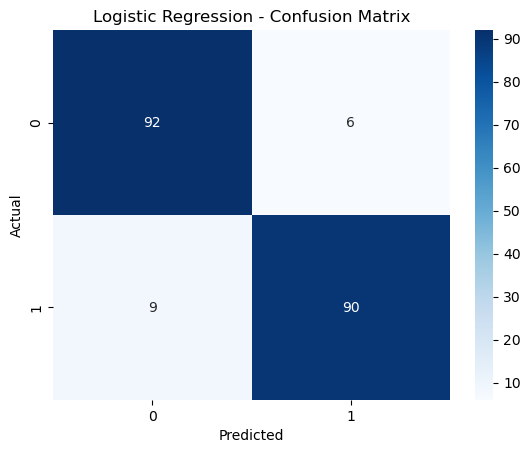

In [14]:
# Confusion Matrix Heatmap for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

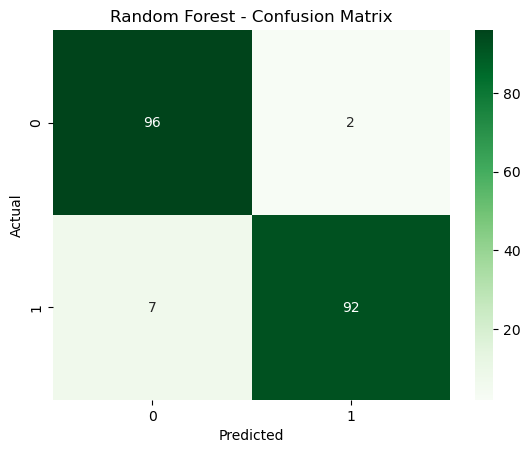

In [15]:
# Confusion Matrix Heatmap for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Hyperparameter Tuning and Cross-Validation


In [16]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [17]:
# Logistic Regression with GridSearchCV and SMOTE
lr_pipeline = make_pipeline(SMOTE(random_state=42), LogisticRegression(max_iter=1000))
lr_param_grid = {'logisticregression__C': [0.1, 1, 10]}


In [18]:
lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, scoring='f1', cv=5)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.1, 1, 10]}, scoring='f1')

In [19]:
# Random Forest with GridSearchCV and SMOTE
rf_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier())
rf_param_grid = {'randomforestclassifier__n_estimators': [100, 200, 300]}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, scoring='f1', cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             scoring='f1')

In [20]:
# Best parameters
print("Logistic Regression Best Parameters:", lr_grid.best_params_)
print("Random Forest Best Parameters:", rf_grid.best_params_)


Logistic Regression Best Parameters: {'logisticregression__C': 10}
Random Forest Best Parameters: {'randomforestclassifier__n_estimators': 300}


In [22]:
# Best models
best_lr = lr_grid.best_estimator_
best_rf = rf_grid.best_estimator_
print(best_lr)
print(best_rf)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000))])
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=300))])


In [23]:
# Evaluate performance
best_lr_pred = best_lr.predict(X_test)
best_rf_pred = best_rf.predict(X_test)
print(best_lr_pred)
print(best_rf_pred)

[0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 1 0]
[0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1
 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 1 0]


In [24]:
print("Logistic Regression:")
print(classification_report(y_test, best_lr_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        98
           1       0.93      0.93      0.93        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [25]:
print("Random Forest:")
print(classification_report(y_test, best_rf_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        98
           1       0.97      0.93      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



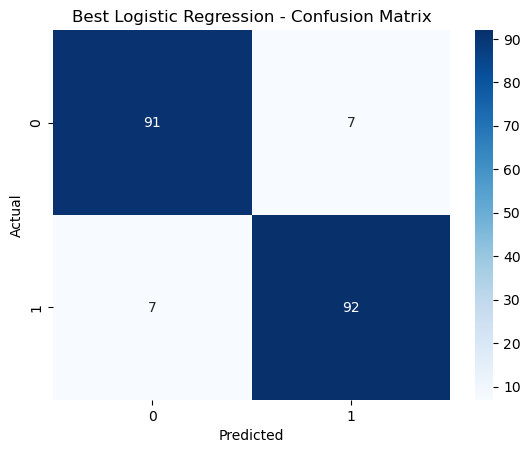

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Best Logistic Regression
best_lr_cm = confusion_matrix(y_test, best_lr_pred)
sns.heatmap(best_lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Best Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

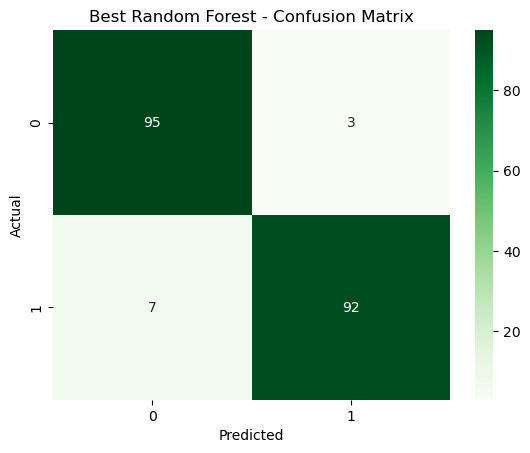

In [27]:
# Confusion Matrix for Best Random Forest
best_rf_cm = confusion_matrix(y_test, best_rf_pred)
sns.heatmap(best_rf_cm, annot=True, cmap='Greens', fmt='g')
plt.title('Best Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()